### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [10]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 


### Step 2:

**Data Uploaading Using Panadas Function**

In [11]:
# Load the dataset
url = 'https://raw.githubusercontent.com/mukeshmagar543/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
47,380.0,95.0,0.0,228.0,0.0,932.0,594.0,180,40.76
387,520.0,0.0,0.0,175.0,5.2,870.0,805.0,28,51.02
135,439.0,177.0,0.0,186.0,11.1,884.9,707.9,28,66.00
1008,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.31
367,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,56,53.96
...,...,...,...,...,...,...,...,...,...
82,401.8,94.7,0.0,147.4,11.4,946.8,852.1,3,41.10
819,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,90,58.78
794,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
878,133.0,210.0,0.0,196.0,3.0,949.0,795.0,28,31.03


### Step 3:

***Doing Exploratory Data Analysis [EDA] :---->***

1. Univariate Analysis

2. Bi Variate Analysis

In [16]:
from collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Median': df[i].median(),
        'Mean': df[i].mean(),
        'Min' : df[i].min(),
        'Max' : df[i].max(),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQWR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing', 'Unique', 'Mode', 'Median', 'Mean', 'Min', 'Max', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'IQWR'], cmap='Reds')

,Feature,Type,Missing,Unique,Mode,Median,Mean,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,IQWR
0,cement,float64,0,278,362.600000,272.900000,281.167864,102.000000,540.000000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,22.000000,73.895825,0.000000,359.400000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,0.000000,54.188350,0.000000,200.100000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,185.000000,181.567282,121.800000,247.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.400000,6.204660,0.000000,32.200000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,968.000000,972.918932,801.000000,1145.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,779.500000,773.580485,594.000000,992.600000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,28.000000,45.662136,1.000000,365.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,34.445000,35.817961,2.330000,82.600000,16.705742,279.081814,0.416977,-0.313725,22.425000


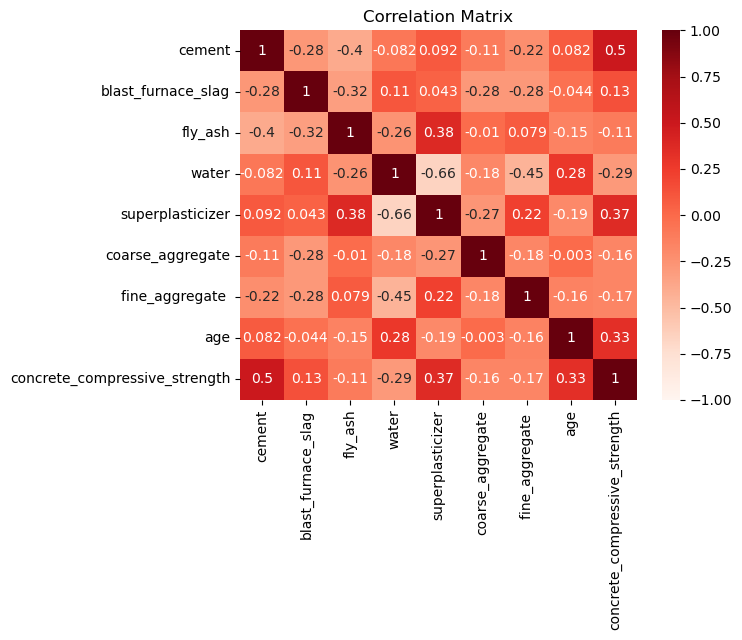

In [24]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlation Matrix')
plt.show()